In [2]:
# library & Install at the top

In [12]:
titanic <- read.table('train.csv', sep=",", header = T)

In [4]:
rownames(titanic) <- titanic$PassengerId
titanic$PassengerId <- NULL
titanic$Name <- NULL
# Remove the data of ID and names, set up the row name as ID

In [5]:
names(titanic)

[1] "Survived" "Pclass"   "Sex"      "Age"      "SibSp"    "Parch"   
 [7] "Ticket"   "Fare"     "Cabin"    "Embarked"

In [6]:
str(titanic)

'data.frame':	891 obs. of  10 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket  : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin   : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [7]:
titanic$Sex <- as.integer(titanic$Sex == 'female') 
str((titanic$Ticket))
# Put the true or false value of the sex into the sex column where female to go to 1, and male go to 0.

 Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...


In [19]:
titanic$Pclass <- factor(titanic$Pclass) # factors are categorical features，not numbers
titanic$Embarked <- factor(titanic$Embarked)
head(titanic,10)
# It turns the class names into differnet levels with corresponding assigned values. (can be 1,2,3 or characters)

Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,22,1,0,A/5 21171,7.2500,,S
1,1,1,38,1,0,PC 17599,71.2833,C85,C
1,3,1,26,0,0,STON/O2. 3101282,7.9250,,S
1,1,1,35,1,0,113803,53.1000,C123,S
0,3,0,35,0,0,373450,8.0500,,S
0,3,0,NA,0,0,330877,8.4583,,Q
0,1,0,54,0,0,17463,51.8625,E46,S
0,3,0,2,3,1,349909,21.0750,,S
1,3,1,27,0,2,347742,11.1333,,S
1,2,1,14,1,0,237736,30.0708,,C


In [20]:
titanic$Ticket <- NULL
titanic$Cabin <- NULL
# remove ticket and cabin data, because there are duplicate data to Fare & Cabin

In [21]:
str(titanic)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [13]:
colSums(is.na(titanic))
# a sum of the items in the column where the value = NA, 177 ages are unknown

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [14]:
attach(titanic)
# turning data to be searchable.

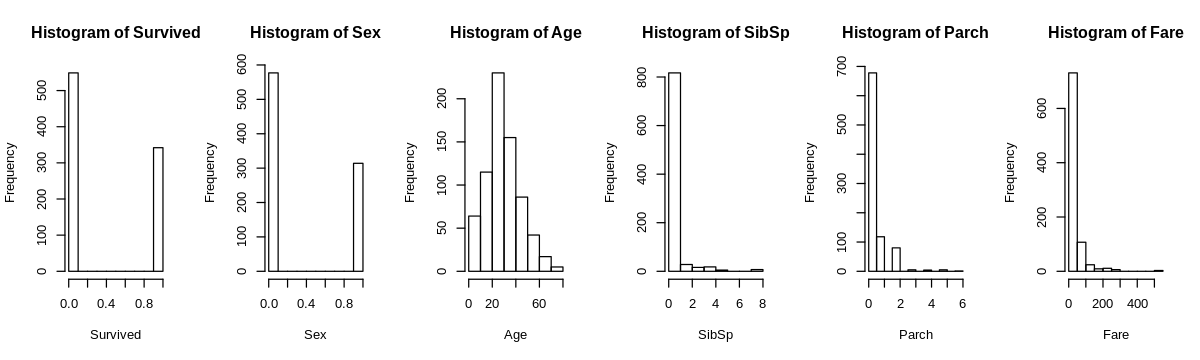

In [29]:
library(repr); options(repr.plot.width=10, repr.plot.height=3)
par(mfrow = c(1,6)) # Par is used to create multi-paneled plot, 1 row and 6 columns
hist(Survived)
hist(Sex)
hist(Age)
hist(SibSp)
hist(Parch)
hist(Fare)

# Set up the histogram size, create multi-paneled plot and graph each attribute. 

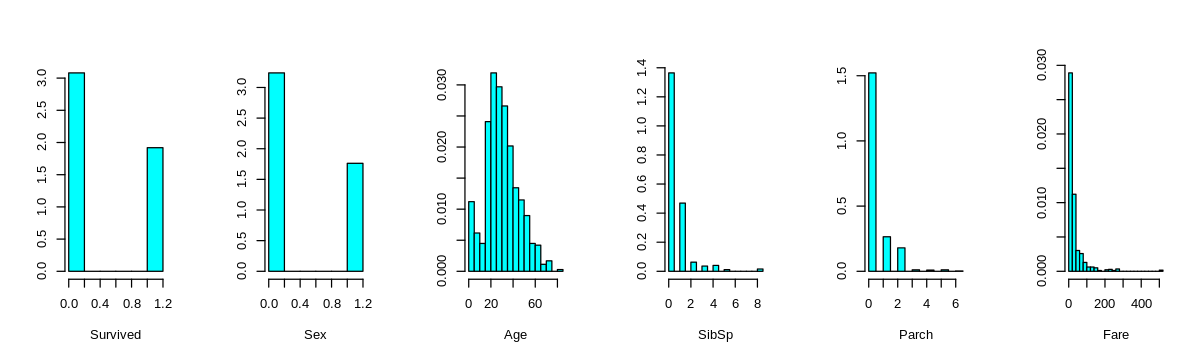

In [32]:
library(MASS)
par(mfrow = c(1,6))
truehist(Survived)
truehist(Sex)
truehist(Age)
truehist(SibSp)
truehist(Parch)
truehist(Fare)
# Proportion add up to 1. Truehist shows the distributions & correlations

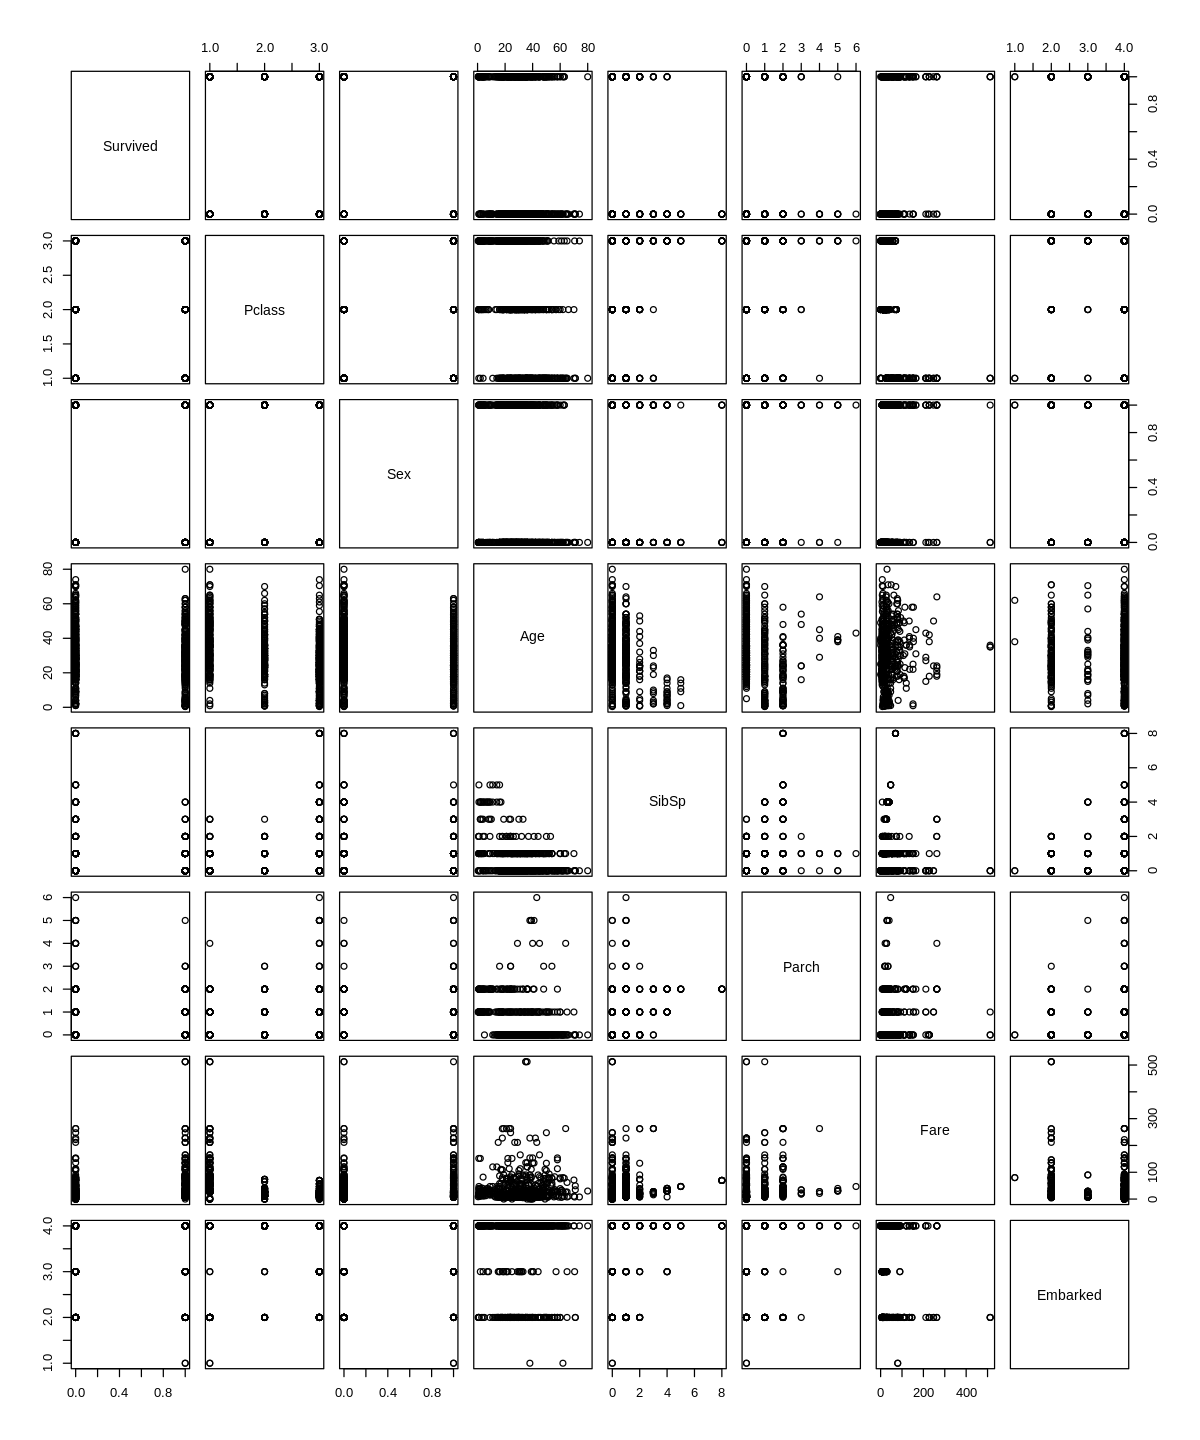

In [39]:
options(repr.plot.width=10, repr.plot.height=12)
pairs(titanic)
# Adjust the size to be readable

In [8]:
titanic_numeric_features <- Filter(is.numeric, titanic) # Filter the tatanic for just the numeric data

In [35]:
cor(titanic_numeric_features)

,Survived,Sex,Age,SibSp,Parch,Fare
Survived,1.00000000,0.5433514,NA,-0.0353225,0.08162941,0.2573065
Sex,0.54335138,1.0000000,NA,0.1146308,0.24548896,0.1823328
Age,NA,NA,1,NA,NA,NA
SibSp,-0.03532250,0.1146308,NA,1.0000000,0.41483770,0.1596510
Parch,0.08162941,0.2454890,NA,0.4148377,1.00000000,0.2162249
Fare,0.25730652,0.1823328,NA,0.1596510,0.21622494,1.0000000


In [9]:
mean(titanic_numeric_features$Age, na.rm = T)

[1] 29.69912

In [10]:
mean_age <- mean(titanic_numeric_features$Age, na.rm = T)
titanic_numeric_features$Age[is.na(titanic_numeric_features$Age)] <- mean_age

In [11]:
cor(titanic_numeric_features)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.00000000,-0.33848104,0.54335138,-0.06980852,-0.03532250,0.08162941,0.25730652
Pclass,-0.33848104,1.00000000,-0.13190049,-0.33133877,0.08308136,0.01844267,-0.54949962
Sex,0.54335138,-0.13190049,1.00000000,-0.08415344,0.11463081,0.24548896,0.18233283
Age,-0.06980852,-0.33133877,-0.08415344,1.00000000,-0.23262459,-0.17919092,0.09156609
SibSp,-0.03532250,0.08308136,0.11463081,-0.23262459,1.00000000,0.41483770,0.15965104
Parch,0.08162941,0.01844267,0.24548896,-0.17919092,0.41483770,1.00000000,0.21622494
Fare,0.25730652,-0.54949962,0.18233283,0.09156609,0.15965104,0.21622494,1.00000000
